# Creating the Model Grid

In this notebook, we will explore how to create the grid of a model. This will be demonstrated for Mike's example model in the California current. You are encouraged to follow along with this notebook to generate the model grid in the domain for your project.

First, import packages to re-create and visualize the model grid here:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

## Tara's Model

The grid for Tara's coarse model will be of the entire planet, with a grid spacing of 1 covering 360 columns and 180 rows. 

The grid for Tara's medium model will be of the entire planet, with a grid spacing of 1/2 covering 720 columns and 360 rows. 

In the data file for my model, I will specifiy the following parameters in the `PARM04` namelist in the `data` file:

COARSE GRID
```
usingSphericalPolarGrid=.TRUE., 
delX = 1 
delY = 1
xgOrigin = -180  
ygOrigin = -90   
```


MEDIUM GRID
```
usingSphericalPolarGrid=.TRUE., 
delX = 1/2 
delY = 1/2
xgOrigin = -180  
ygOrigin = -90   
```

This grid can be recreated in Python as follows:

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# COARSE GRID PARAMS
delX_coarse, delY_coarse = 1, 1
n_cols_coarse, n_rows_coarse = 360, 180

# MED GRID PARAMS
delX_med, delY_med = 1/2, 1/2
n_cols_med, n_rows_med = 720, 360

xgOrigin, ygOrigin = -180, -90

# Generate Coarse Grid
xc_coarse = np.arange(xgOrigin + delX_coarse / 2, xgOrigin + n_cols_coarse * delX_coarse + delX_coarse / 2, delX_coarse)
yc_coarse = np.arange(ygOrigin + delY_coarse / 2, ygOrigin + n_rows_coarse * delY_coarse + delY_coarse / 2, delY_coarse)
XC_coarse, YC_coarse = np.meshgrid(xc_coarse, yc_coarse)

# Generate Medium Grid
xc_med = np.arange(xgOrigin + delX_med / 2, xgOrigin + n_cols_med * delX_med + delX_med / 2, delX_med)
yc_med = np.arange(ygOrigin + delY_med / 2, ygOrigin + n_rows_med * delY_med + delY_med / 2, delY_med)
XC_med, YC_med = np.meshgrid(xc_med, yc_med)

print(f'Coarse Grid -\nnum rows: {n_rows_coarse}\nnum cols: {n_cols_coarse}\ntot cels: {n_rows_coarse*n_cols_coarse}')
print(f'\nMedium Grid -\nnum rows: {n_rows_med}\nnum cols: {n_cols_med}\ntot cels: {n_rows_med*n_cols_med}')

Coarse Grid -
num rows: 180
num cols: 360
tot cels: 64800

Medium Grid -
num rows: 360
num cols: 720
tot cels: 259200


### Visualizing the Grid
The grids above can be visualized as follows:

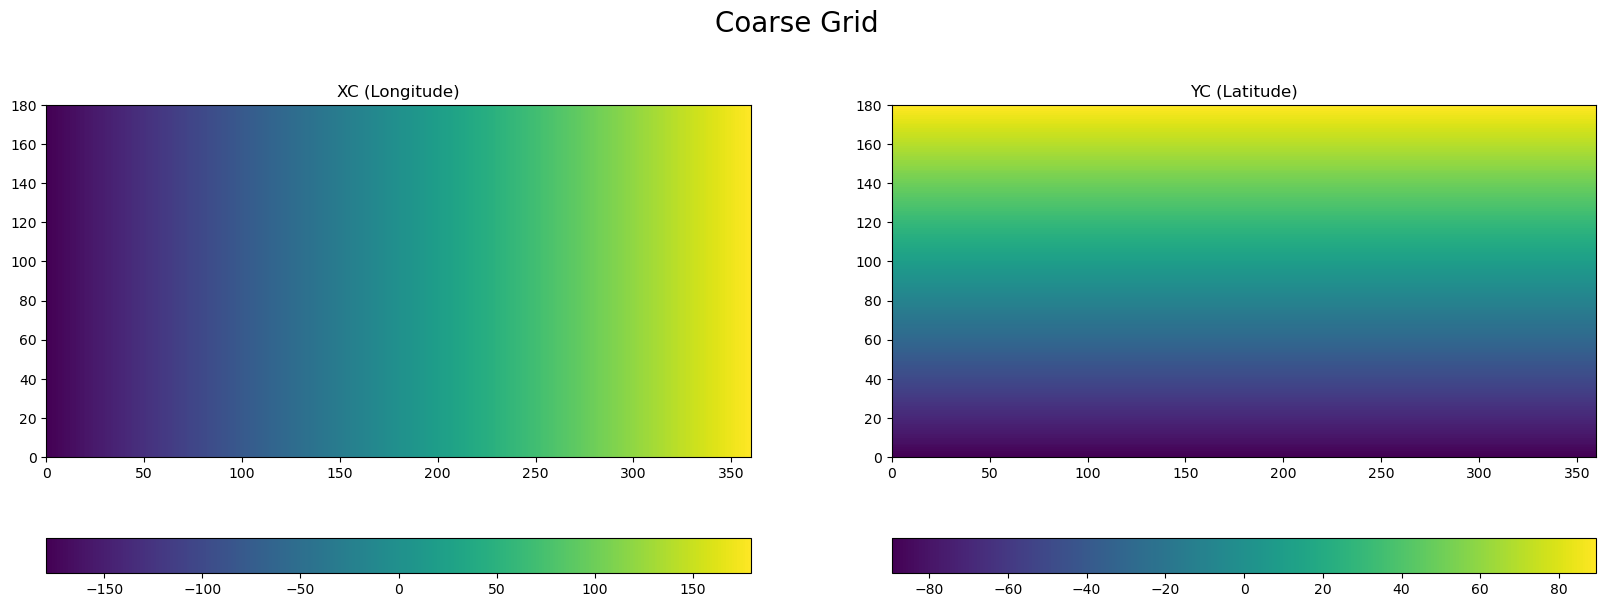

In [14]:
# make a plot of XC and YC
plt.figure(figsize=(20,7))


plt.subplot(1,2,1)
C = plt.pcolormesh(XC_coarse)
plt.colorbar(C, orientation = 'horizontal')
plt.title('XC (Longitude)')
plt.gca().set_aspect('equal', adjustable='box')

plt.subplot(1,2,2)
C = plt.pcolormesh(YC_coarse)
plt.colorbar(C, orientation = 'horizontal')
plt.title('YC (Latitude)')
plt.gca().set_aspect('equal', adjustable='box')

plt.suptitle('Coarse Grid', fontsize=20)

plt.show()

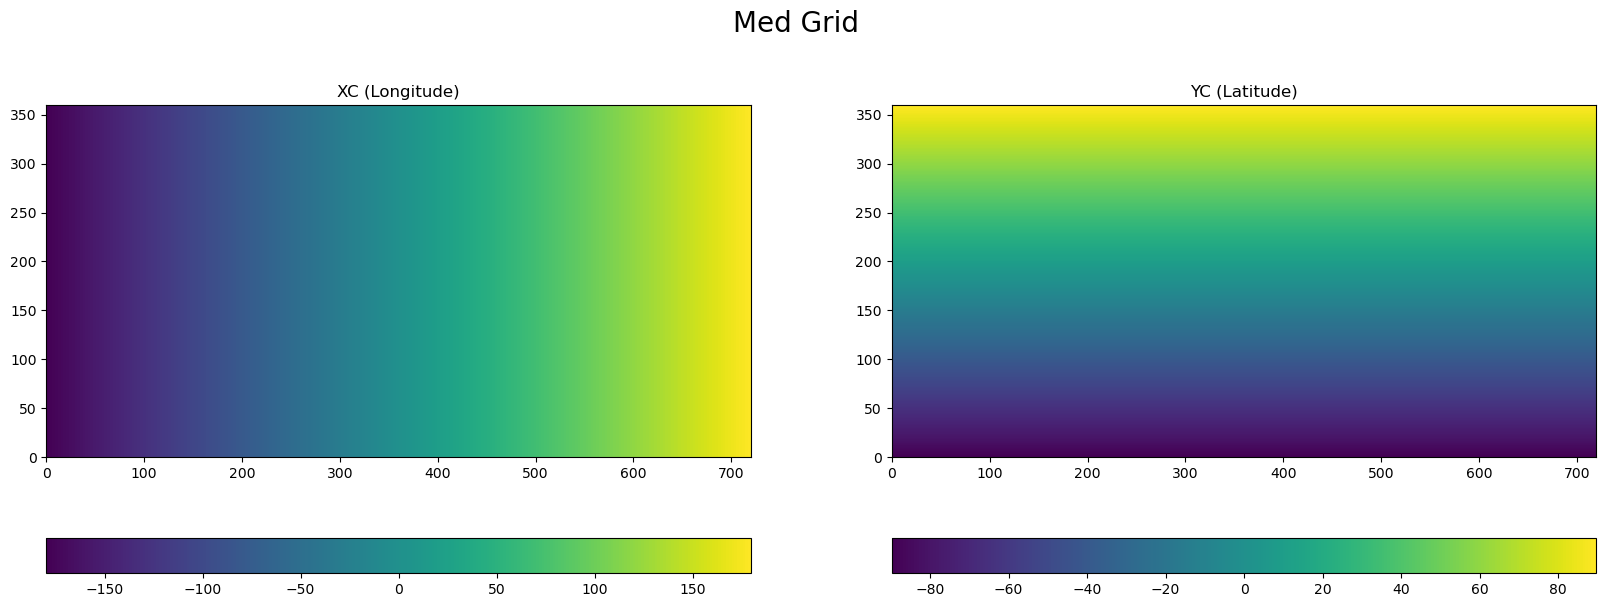

In [15]:
# make a plot of XC and YC
plt.figure(figsize=(20,7))


plt.subplot(1,2,1)
C = plt.pcolormesh(XC_med)
plt.colorbar(C, orientation = 'horizontal')
plt.title('XC (Longitude)')
plt.gca().set_aspect('equal', adjustable='box')

plt.subplot(1,2,2)
C = plt.pcolormesh(YC_med)
plt.colorbar(C, orientation = 'horizontal')
plt.title('YC (Latitude)')
plt.gca().set_aspect('equal', adjustable='box')

plt.suptitle('Med Grid', fontsize=20)

plt.show()

### Visualizing the Grid on a Map with Cartopy
To get a sense of where the model is located on the globe, cartopy can be be used to plot the domain on the globe:

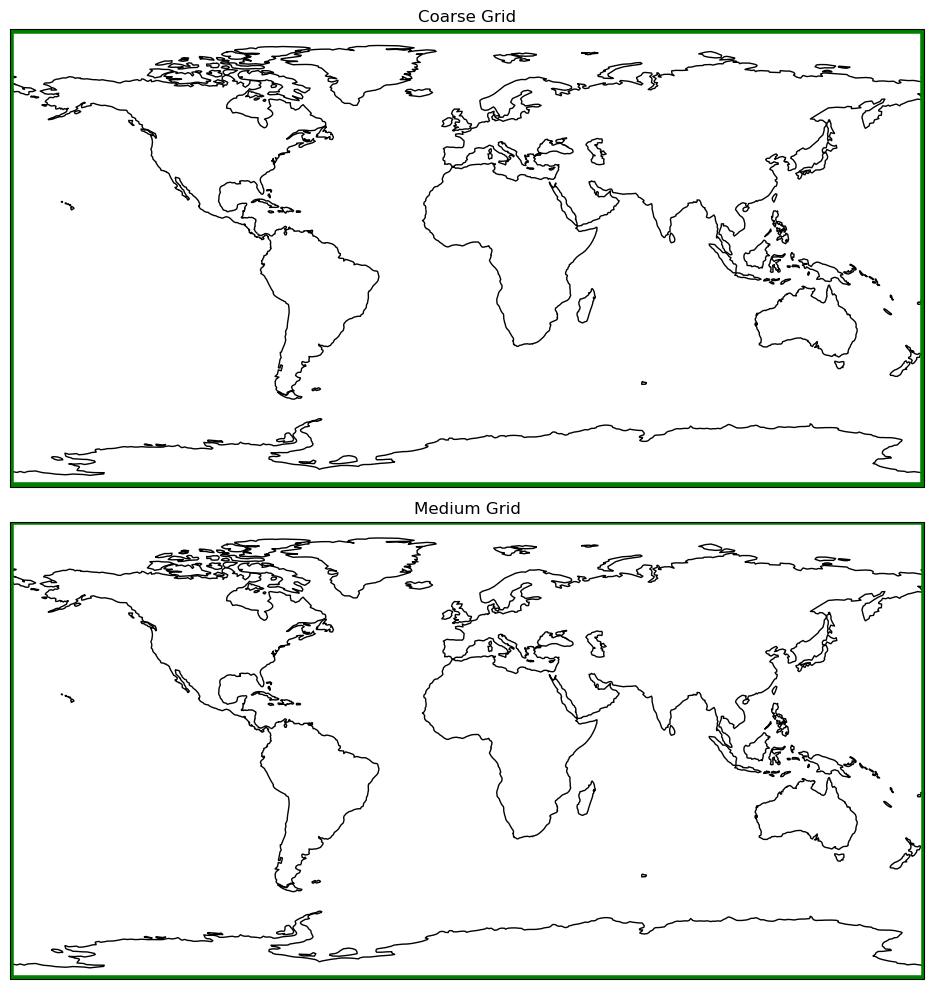

In [17]:

# Plot the grids
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot Coarse Grid
ax1.plot(XC_coarse[:, 0], YC_coarse[:, 0], 'g-', linewidth=4, transform=ccrs.PlateCarree())
ax1.plot(XC_coarse[:, -1], YC_coarse[:, -1], 'g-', linewidth=4, transform=ccrs.PlateCarree())
ax1.plot(XC_coarse[0, :], YC_coarse[0, :], 'g-', linewidth=4, transform=ccrs.PlateCarree())
ax1.plot(XC_coarse[-1, :], YC_coarse[-1, :], 'g-', linewidth=4, transform=ccrs.PlateCarree())
ax1.coastlines()
ax1.set_title('Coarse Grid')
ax1.set_global()

# Plot Medium Grid
ax2.plot(XC_med[:, 0], YC_med[:, 0], 'g-', linewidth=4, transform=ccrs.PlateCarree())
ax2.plot(XC_med[:, -1], YC_med[:, -1], 'g-', linewidth=4, transform=ccrs.PlateCarree())
ax2.plot(XC_med[0, :], YC_med[0, :], 'g-', linewidth=4, transform=ccrs.PlateCarree())
ax2.plot(XC_med[-1, :], YC_med[-1, :], 'g-', linewidth=4, transform=ccrs.PlateCarree())
ax2.coastlines()
ax2.set_title('Medium Grid')
ax2.set_global()

plt.tight_layout()
plt.show()

### Visualizing the Grid Spacing
The model grid is defined in terms of units in longitude and latitude although it is useful to quantify the grid spacing in terms of more familiar units, such as meters. The following `great_circle_distance` function can be used to quantify this distance:

In [18]:
def great_circle_distance(lon_ref, lat_ref, Lon, Lat):
    earth_radius = 6371000
    lon_ref_radians = np.radians(lon_ref)
    lat_ref_radians = np.radians(lat_ref)
    lons_radians = np.radians(Lon)
    lats_radians = np.radians(Lat)
    lat_diff = lats_radians - lat_ref_radians
    lon_diff = lons_radians - lon_ref_radians
    d = np.sin(lat_diff * 0.5) ** 2 + np.cos(lat_ref_radians) * np.cos(lats_radians) * np.sin(lon_diff * 0.5) ** 2
    h = 2 * earth_radius * np.arcsin(np.sqrt(d))
    return(h)

Then, loop through the points to generate inter-point distances in the horizontal (`dXC`) and vertical (`dYC`) directions:

In [20]:
def get_res(XC, YC):
    dXC = np.zeros((np.shape(XC)[0], np.shape(XC)[1]-1))
    for row in range(np.shape(XC)[0]):
        for col in range(np.shape(XC)[1]-1):
            dXC[row,col] = great_circle_distance(XC[row,col], YC[row,col], XC[row,col+1], YC[row,col+1])

    dYC = np.zeros((np.shape(YC)[0]-1, np.shape(YC)[1]))
    for row in range(np.shape(XC)[0]-1):
        for col in range(np.shape(XC)[1]):
            dYC[row,col] = great_circle_distance(XC[row,col], YC[row,col], XC[row+1,col], YC[row+1,col])

    print(f'Approx Res: {int(dYC.mean()/1000)} km')
    return dXC, dYC
print(f'COARSE GRID')
dXC_coarse, dYC_coarse = get_res(XC_coarse, YC_coarse)
print(f'MEDIUM GRID')
dXC_med, dYC_med = get_res(XC_med, YC_med)

COARSE GRID
Approx Res: 111 km
MEDIUM GRID
Approx Res: 55 km


Finally, make a plot of the inter-point distances:

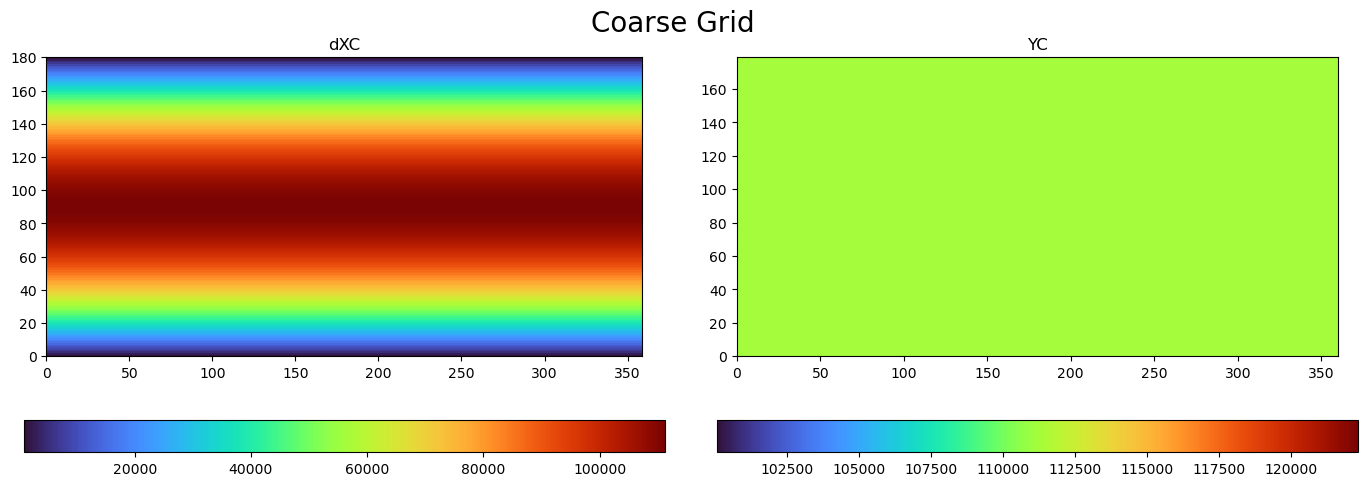

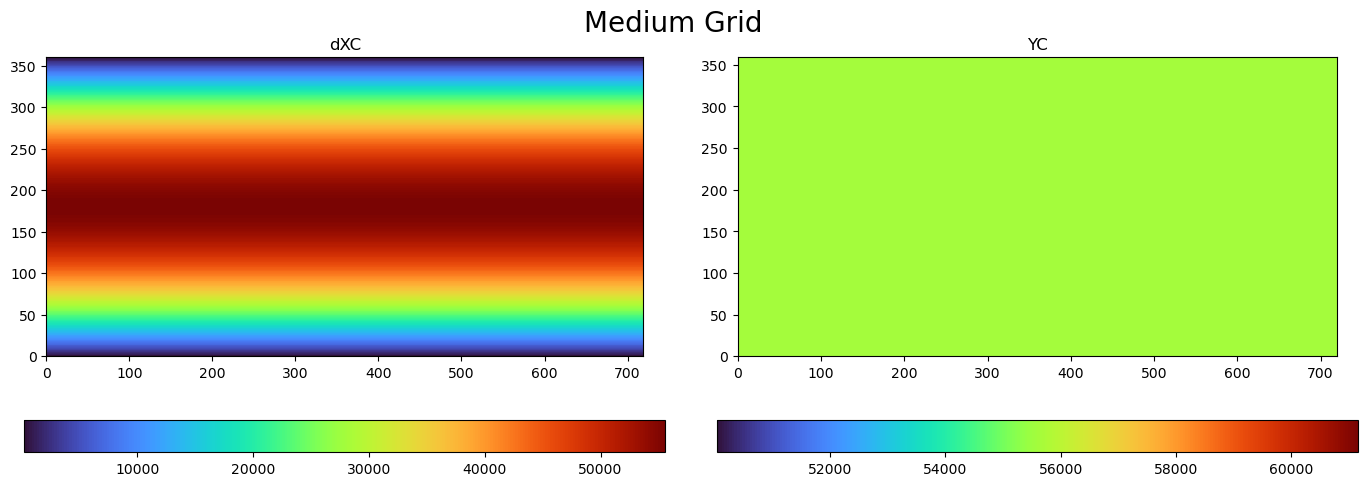

In [21]:
def plot_interpt_dist(dXC, dYC, type = 'coarse'):
    plt.figure(figsize=(14,5))

    plt.subplot(1,2,1)
    C = plt.pcolormesh(dXC, cmap = 'turbo') #, vmin = dXC.min(), vmax = dXC.max())
    plt.colorbar(C, orientation = 'horizontal')
    plt.title('dXC')
    plt.gca().set_aspect('equal', adjustable='box')


    plt.subplot(1,2,2)
    C = plt.pcolormesh(dYC.round(3), cmap = 'turbo')
    plt.colorbar(C, orientation = 'horizontal')
    plt.title('YC')
    plt.gca().set_aspect('equal', adjustable='box')

    if type == 'coarse':
        plt.suptitle('Coarse Grid', fontsize=20)
    elif type == 'med':
        plt.suptitle('Medium Grid', fontsize=20)

    plt.tight_layout()
    plt.show()

plot_interpt_dist(dXC_coarse, dYC_coarse, 'coarse')
plot_interpt_dist(dXC_med, dYC_med, 'med')